In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import *
from features import *
import matplotlib.pyplot as plt
import librosa
import librosa.display
import gc

In [3]:
TEST_SIZE = 0.4
RANDOM_SEED = 191

SAMPLE_RATE = 44100 / 3

N_FFT = 2048
HOP_LENGTH = 512
N_MEL_BINS = 128
N_MFCC = 24

WINDOW = 'blackmanharris'

LEARNING_RATE = 1e-3
BATCH_SIZE = 64

In [4]:
from prepare_data import sample_train_test_songs, form_audio_data_array

train_songs, val_songs, test_songs = sample_train_test_songs(test_size=TEST_SIZE, random_seed=RANDOM_SEED, include_val=True)
print(f'Train: {len(train_songs)} songs')
print(f'Val: {len(val_songs)} songs')
print(f'Test: {len(test_songs)} songs')

Train: 35 songs
Val: 5 songs
Test: 5 songs


In [5]:
# X_train, Y_train = form_audio_data_array(song_names=train_songs, sample_rate=SAMPLE_RATE, window=WINDOW, n_fft=N_FFT,
#                                          hop_length=HOP_LENGTH, n_mel=N_MEL_BINS, n_mfcc=N_MFCC)
# X_val, Y_val = form_audio_data_array(song_names=val_songs, sample_rate=SAMPLE_RATE, window=WINDOW, n_fft=N_FFT,
#                                      hop_length=HOP_LENGTH, n_mel=N_MEL_BINS, n_mfcc=N_MFCC)
# X_test, Y_test = form_audio_data_array(song_names=test_songs, sample_rate=SAMPLE_RATE, window=WINDOW, n_fft=N_FFT,
#                                        hop_length=HOP_LENGTH, n_mel=N_MEL_BINS, n_mfcc=N_MFCC)

# print(X_train.shape, Y_train.shape)
# print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

Jin Suga J-Hope RM Jimin V Jungkook 
(104, 24, 290) (104,)


In [6]:
# np.save(f'tmp/X_train_{RANDOM_SEED}_{N_MFCC}.npy', X_train)
# np.save(f'tmp/Y_train_{RANDOM_SEED}_{N_MFCC}.npy', Y_train)
# np.save(f'tmp/X_val_{RANDOM_SEED}_{N_MFCC}.npy', X_val)
# np.save(f'tmp/Y_val_{RANDOM_SEED}_{N_MFCC}.npy', Y_val)
# np.save(f'tmp/X_test_{RANDOM_SEED}_{N_MFCC}.npy', X_test)
# np.save(f'tmp/Y_test_{RANDOM_SEED}_{N_MFCC}.npy', Y_test)

In [5]:
with open(f'tmp/X_train_{RANDOM_SEED}_{N_MFCC}.npy', 'rb') as f:
    X_train = np.load(f)
with open(f'tmp/Y_train_{RANDOM_SEED}_{N_MFCC}.npy', 'rb') as f:
    Y_train = np.load(f)
with open(f'tmp/X_val_{RANDOM_SEED}_{N_MFCC}.npy', 'rb') as f:
    X_val = np.load(f)
with open(f'tmp/Y_val_{RANDOM_SEED}_{N_MFCC}.npy', 'rb') as f:
    Y_val = np.load(f)
with open(f'tmp/X_test_{RANDOM_SEED}_{N_MFCC}.npy', 'rb') as f:
    X_test = np.load(f)
with open(f'tmp/Y_test_{RANDOM_SEED}_{N_MFCC}.npy', 'rb') as f:
    Y_test = np.load(f)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(971, 24, 290) (971,)
(126, 24, 290) (126,)
(104, 24, 290) (104,)


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2 as L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
gc.collect()

22521

In [82]:
try:
    del model
except:
    pass

model = tf.keras.Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=512, activation='relu'),
    Dense(units=256, activation='relu'),
#     Dense(units=128, activation='relu'),
#     Dense(units=512, activation='relu', kernel_regularizer=L2(l=0.01)),
#     Dense(units=256, activation='relu', kernel_regularizer=L2(l=0.01)),
#     Dense(units=128, activation='relu', kernel_regularizer=L2(l=0.01)),
    Dense(units=7, activation='softmax')
])

optimiser = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True)
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE, epochs=100, callbacks=[early_stopping])

Train on 971 samples, validate on 126 samples
Epoch 1/100
971/971 [==============================] - 1s 829us/sample - loss: 482.8912 - accuracy: 0.1390 - val_loss: 153.9160 - val_accuracy: 0.0794
Epoch 2/100
971/971 [==============================] - 0s 211us/sample - loss: 76.1886 - accuracy: 0.3100 - val_loss: 39.9672 - val_accuracy: 0.2381
Epoch 3/100
971/971 [==============================] - 0s 207us/sample - loss: 22.0206 - accuracy: 0.4552 - val_loss: 46.2376 - val_accuracy: 0.2302
Epoch 4/100
971/971 [==============================] - 0s 266us/sample - loss: 11.6988 - accuracy: 0.6159 - val_loss: 17.5798 - val_accuracy: 0.4206
Epoch 5/100
971/971 [==============================] - 0s 253us/sample - loss: 4.4594 - accuracy: 0.7477 - val_loss: 19.0415 - val_accuracy: 0.3333
Epoch 6/100
971/971 [==============================] - 0s 339us/sample - loss: 1.9931 - accuracy: 0.8187 - val_loss: 20.6151 - val_accuracy: 0.3095
Epoch 7/100
971/971 [==============================] - 0s 38

In [84]:
train_results = model.evaluate(X_train, Y_train)
train_results

971/971 [==============================] - 0s 266us/sample - loss: 0.0013 - accuracy: 1.0000


[0.0012525666049870634, 1.0]

In [85]:
val_results = model.evaluate(X_val, Y_val)
val_results

126/126 [==============================] - 0s 356us/sample - loss: 15.8126 - accuracy: 0.4841


[15.812564849853516, 0.48412699]

In [86]:
test_results = model.evaluate(X_test, Y_test)
test_results

104/104 [==============================] - 0s 399us/sample - loss: 23.0622 - accuracy: 0.3654


[23.062242948091946, 0.3653846]

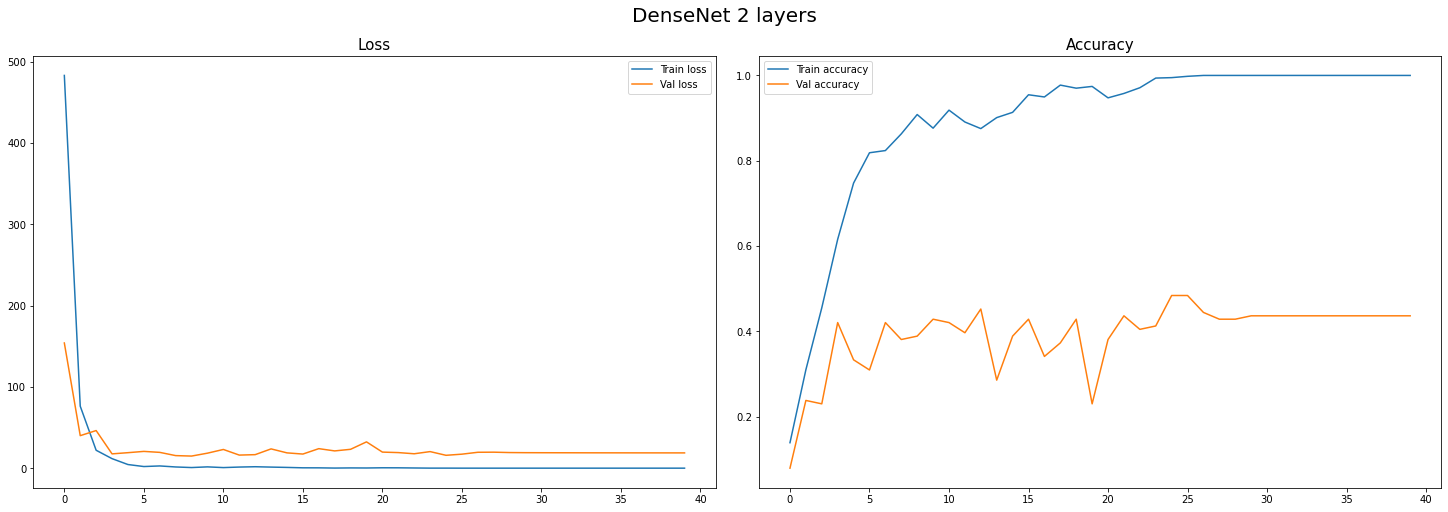

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7), constrained_layout=True)

ax[0].plot(history.history['loss'], label='Train loss')
ax[0].plot(history.history['val_loss'], label='Val loss')
ax[1].plot(history.history['accuracy'], label='Train accuracy')
ax[1].plot(history.history['val_accuracy'], label='Val accuracy')

fig.suptitle(f'DenseNet 2 layers', fontsize=20)
ax[0].set_title(f'Loss', fontsize=15)
ax[1].set_title(f'Accuracy', fontsize=15)

ax[0].legend()
ax[1].legend()